In [1]:
import pandas as pd
import matplotlib.pylab as plt

In [2]:
df = pd.read_csv('company.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

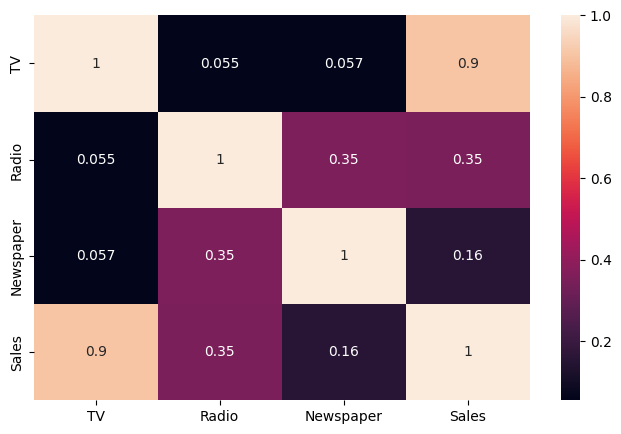

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
 
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True)
plt.show()

<Axes: xlabel='TV', ylabel='Sales'>

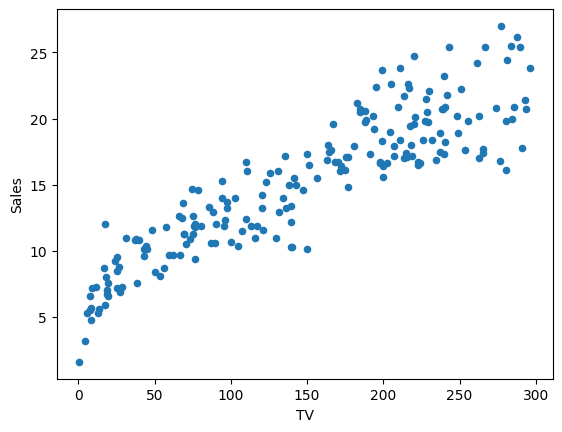

In [5]:
df.plot(kind='scatter',x='TV',y='Sales')

In [6]:
x =df[['TV','Radio','Newspaper']]
y=df[['Sales']]    

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3,random_state=101)

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [9]:
model.score(x,y)

0.9019022768297327

In [10]:
print( model.intercept_)
print( model.coef_)

[4.68123215]
[[ 0.05493018  0.1095576  -0.00619422]]


In [11]:
df_comp=y_test
df_comp['predictions']=model.predict(x_test)
df_comp

,Sales,predictions
37,14.7,13.913586
109,19.8,21.623432
31,11.9,12.550055
89,16.7,15.631037
66,11.0,9.093023
119,6.6,7.361668
54,20.2,22.168162
74,17.0,19.017306
145,10.3,12.540349
142,20.1,20.195889


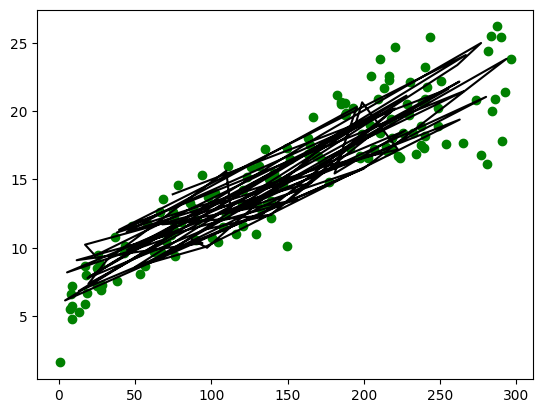

In [12]:
plt.scatter(x_train[['TV']], y_train, color="g")

plt.plot(x_test[['TV']], model.predict(x_test), color="k")

In [27]:
coef = model.coef_.flatten().tolist()
coef

[0.05493018443416217, 0.10955759765021192, -0.006194217880097576]

In [31]:
intercept = model.intercept_.flatten().tolist()

In [35]:
intercept_series = pd.Series(intercept)
coef_series = pd.Series(coef)
score_series = pd.Series(model.score(x,y))

In [43]:
df_excel = pd.DataFrame([intercept_series,coef_series,score_series],)
df_excel.index = ['intercetta','coefficienti', 'score']

In [45]:
df_excel.to_excel('modello.xlsx')